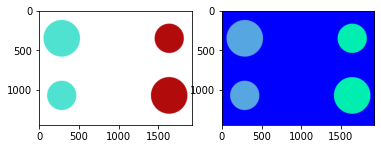

In [25]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('img/circulo.png')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1,2,1)
plt.imshow(imgRGB)
plt.subplot(1,2,2)
plt.imshow(imgHSV)
plt.show()

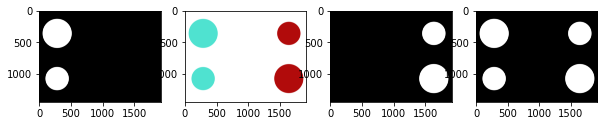

In [56]:
# HSV AQUAMARINE 173,65,89
# HSV VERMELHO 0,94,69
# HSV FUNDO 0,0,100

# definindo range de cor aquamarine para openCV
caquamarine_min = np.array([86,64,88])
caquamarine_max = np.array([87,255,255])
maquamarine = cv2.inRange(imgHSV, caquamarine_min, caquamarine_max)

# definindo range de cor vermelho para openCV
cvermelho_min = np.array([0,93,68])
cvermelho_max = np.array([10,255,255])
mvermelho = cv2.inRange(imgHSV, cvermelho_min, cvermelho_max)

plt.figure(figsize = (10,10))
plt.subplot(1,4,2)
plt.imshow(imgRGB)
plt.subplot(1,4,1)
plt.imshow(maquamarine, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1,4,3)
plt.imshow(mvermelho, cmap="Greys_r", vmin=0, vmax=255)

# definindo range de cores para openCV
mask_min = np.array([0,64,68])
mask_max = np.array([87,255,255])
mask = cv2.inRange(imgHSV, mask_min, mask_max)

plt.subplot(1,4,4)
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

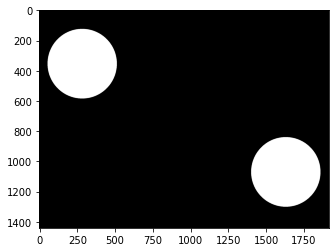

In [72]:
# segmentar apenas os circulos maiores com crop

altura = mask.shape[0]
largura = mask.shape[1]

black = maquamarine[:int(altura/2),int(largura/2):]
mask_lg = mask.copy()
mask_lg[:int(altura/2),int(largura/2):] = black
mask_lg[int(altura/2):,:int(largura/2)] = black

plt.imshow(mask_lg, cmap="Greys_r", vmin=0, vmax=255)
plt.show()